# Introduction
Dataset Description
his data set contains information about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue.I'll ask questions related to genres and user votes, budget & profits.

Question(s) for Analysis
- Nowadays, there is a trend to produce some kind of movie genres as they have produced remarkable revenue. Therefore, first I will examine what is the profitable movie gerne as some movies may generate great revenue but that much profitable compared to their budget.
- Also, Iam interested to examine if the movie runtimes could affect the user votings.
- finally, I want to analysis if there was some kind of trend related to the movie budgets & profits through the years as well. 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Wrangling
In this section of the report, I will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.

General Properties
After observing the dataset,I will be keeping only relevent data deleting the unsued data so that I can analyse the data.

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.shape

(10866, 21)

In [5]:
row, colume = df.shape
print('There are {} total entries of movies and {} no.of columns in it.'.format(row, colume))

There are 10866 total entries of movies and 21 no.of columns in it.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


- From the above data, I observed that some items have missed data like cast, homepage, director, tagline, keywords & production_companies.
- Besides some data have no significant value for evaluations e.g. (Id, tagline,homepage....etc)
- Also, my interest will be related to the profit related factor (e.g. popularity & genres)

# Data Cleaning
Tip: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

as I decribed earlier, I will clean the examined data from duplicates, missing, inadequate datatypes so i will do the following: 1- remove the duplicates 2-remove the unused data such as id, imdb_id, original_title, cast, homepage, tagline, keywords, overview, vote_count, release_date, budget_adj & revenue_adj 3- delete the null rows
4-Since I am answering questions based on genres, I have to first treat these columns as it has multiple values inside a single observation where the values are separated by the character |
So I can use the pandas explode function to separate them for my analysis.
This way I'll have counts for individual genres, not in groups defined by movies.But, the number of rows will increase after exploding.

In [8]:
# detect the duplicates
df.duplicated().sum()

1

In [9]:
# remove the duplicates
df.drop_duplicates(inplace = True)

In [10]:
# confirm that the duplicate row was deleted
row, colume = df.shape
print('There are {} total entries of movies and {} no.of columns in it.'.format(row, colume))

There are 10865 total entries of movies and 21 no.of columns in it.


In [11]:
#drop unused columns for readability
df.drop(['id', 'imdb_id', 'popularity', 'original_title', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'vote_count', 'budget_adj', 'release_date', 'revenue_adj'], axis = 1, inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                10865 non-null  int64  
 1   revenue               10865 non-null  int64  
 2   director              10821 non-null  object 
 3   runtime               10865 non-null  int64  
 4   genres                10842 non-null  object 
 5   production_companies  9835 non-null   object 
 6   vote_average          10865 non-null  float64
 7   release_year          10865 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 763.9+ KB


In [13]:
# some data contains zero value in budget, revenue & runtimes, So, I replace zero with NAN in their column.
df['runtime'] = df['runtime'].replace(0, np.NAN)

In [14]:
df['revenue'] = df['revenue'].replace(0, np.NAN)

In [15]:
df['budget'] = df['budget'].replace(0, np.NAN)

In [16]:
# confirm that the zero values were deleted
df.describe()

,budget,revenue,runtime,vote_average,release_year
count,5.169000e+03,4.849000e+03,10834.000000,10865.000000,10865.000000
mean,3.073958e+07,8.923886e+07,102.363855,5.975012,2001.321859
std,3.890441e+07,1.620801e+08,30.948225,0.935138,12.813260
min,1.000000e+00,2.000000e+00,2.000000,1.500000,1960.000000
25%,6.000000e+06,7.732325e+06,90.000000,5.400000,1995.000000
50%,1.700000e+07,3.185308e+07,99.000000,6.000000,2006.000000
75%,4.000000e+07,9.996575e+07,112.000000,6.600000,2011.000000
max,4.250000e+08,2.781506e+09,900.000000,9.200000,2015.000000


In [17]:
# remove the null rows 
df.dropna(inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3807 entries, 0 to 10848
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                3807 non-null   float64
 1   revenue               3807 non-null   float64
 2   director              3807 non-null   object 
 3   runtime               3807 non-null   float64
 4   genres                3807 non-null   object 
 5   production_companies  3807 non-null   object 
 6   vote_average          3807 non-null   float64
 7   release_year          3807 non-null   int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 267.7+ KB


array([[<AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'revenue'}>],
       [<AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_average'}>],
       [<AxesSubplot:title={'center':'release_year'}>, <AxesSubplot:>]],
      dtype=object)

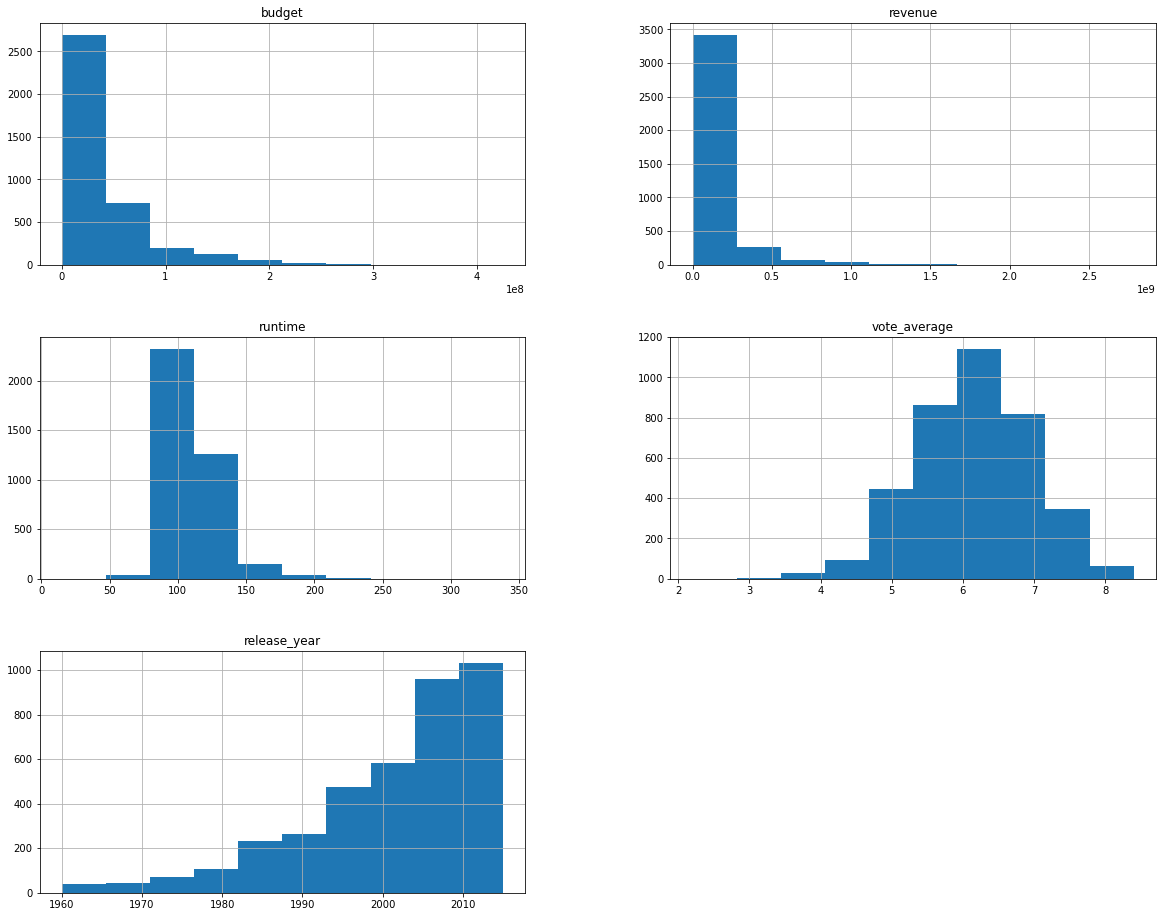

In [19]:
#Now I'm visualizing the data to get a better view
df.hist(figsize=(20,16))

In [20]:
# separate the genre column (multiple values) into a single observation where the values are separated by the character |
df['genres'] = df['genres'].apply(lambda x: x.split('|')[0])

In [21]:
df.head()

,budget,revenue,director,runtime,genres,production_companies,vote_average,release_year
0,150000000.0,1.513529e+09,Colin Trevorrow,124.0,Action,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015
1,150000000.0,3.784364e+08,George Miller,120.0,Action,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015
2,110000000.0,2.952382e+08,Robert Schwentke,119.0,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015
3,200000000.0,2.068178e+09,J.J. Abrams,136.0,Action,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015
4,190000000.0,1.506249e+09,James Wan,137.0,Action,Universal Pictures|Original Film|Media Rights ...,7.3,2015


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3807 entries, 0 to 10848
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                3807 non-null   float64
 1   revenue               3807 non-null   float64
 2   director              3807 non-null   object 
 3   runtime               3807 non-null   float64
 4   genres                3807 non-null   object 
 5   production_companies  3807 non-null   object 
 6   vote_average          3807 non-null   float64
 7   release_year          3807 non-null   int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 267.7+ KB


# Exploratory Data Analysis
Tip: Now that I've trimmed and cleaned the data, I am ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that I posed in the Introduction section. I should compute the relevant statistics throughout the analysis when an inference is made about the data. 

# Research Question 1 (what is the genres with the highest profits !)

In [23]:
#calculate the profit of each movie ( revenue-budget)
#insert a new column for profit
df.insert(2,'profits',df['revenue']-df['budget'])

In [24]:
#viewing the changes in the columns
df.head()

,budget,revenue,profits,director,runtime,genres,production_companies,vote_average,release_year
0,150000000.0,1.513529e+09,1.363529e+09,Colin Trevorrow,124.0,Action,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015
1,150000000.0,3.784364e+08,2.284364e+08,George Miller,120.0,Action,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015
2,110000000.0,2.952382e+08,1.852382e+08,Robert Schwentke,119.0,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015
3,200000000.0,2.068178e+09,1.868178e+09,J.J. Abrams,136.0,Action,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015
4,190000000.0,1.506249e+09,1.316249e+09,James Wan,137.0,Action,Universal Pictures|Original Film|Media Rights ...,7.3,2015


In [25]:
# Which genres are most popularprofit from year to year?
genres_profit = df.groupby(['genres'])['profits'].mean()
print (genres_profit)

genres
Action             8.471083e+07
Adventure          1.574563e+08
Animation          1.999005e+08
Comedy             5.340246e+07
Crime              4.542992e+07
Documentary        2.039506e+07
Drama              4.077105e+07
Family             1.571622e+08
Fantasy            1.052076e+08
History            7.828396e+07
Horror             4.018314e+07
Music              4.524902e+07
Mystery            4.163414e+07
Romance            7.495912e+07
Science Fiction    1.210682e+08
TV Movie           3.700000e+07
Thriller           4.522713e+07
War                7.627563e+07
Western            3.383666e+07
Name: profits, dtype: float64


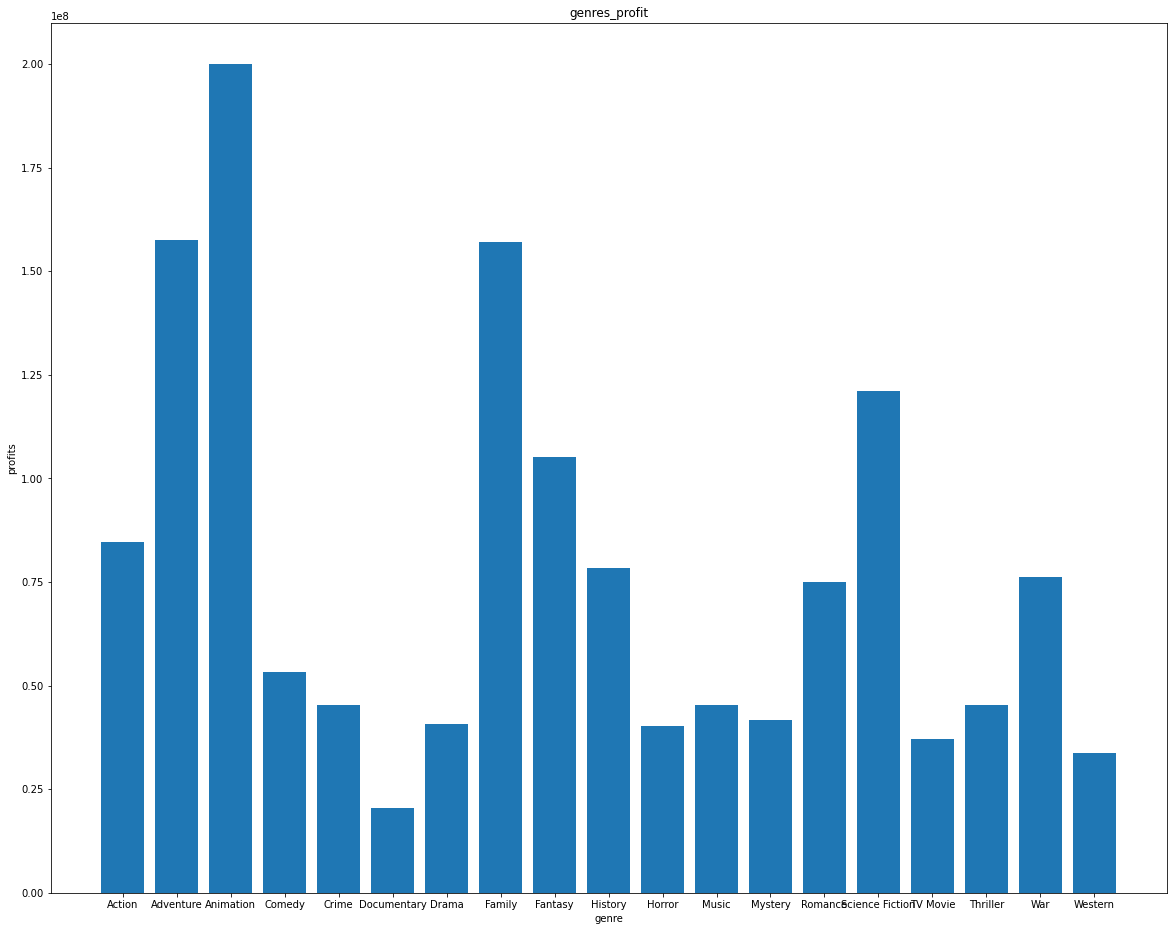

In [26]:
#visualize the data
plt.subplots(figsize=(20, 16))
plt.bar(genres_profit.index, genres_profit)
plt.title('genres_profit')
plt.xlabel('genre')
plt.ylabel('profits');

So I can see that animation, family & adventure movies generate the highest profits.

# Research Question 2 (the relation between the vote_average & run times !)

C:\Users\Nourhan Hassan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


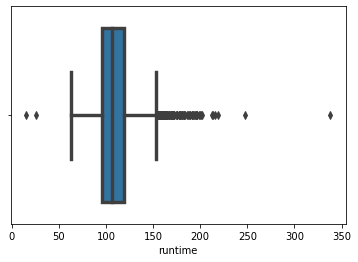

<Figure size 1000x700 with 0 Axes>

In [27]:
#using seaborn to generate the boxplot for runtimes
sns.boxplot(df['runtime'], linewidth = 3.4)
plt.figure(figsize=(10,7), dpi = 100)
plt.show()

In [28]:
time_average = df.groupby(['runtime'])['vote_average'].mean()
print (time_average)

runtime
15.0     6.8
26.0     7.4
63.0     6.8
66.0     5.2
69.0     6.9
        ... 
214.0    5.8
216.0    7.5
219.0    6.0
248.0    6.3
338.0    6.2
Name: vote_average, Length: 136, dtype: float64


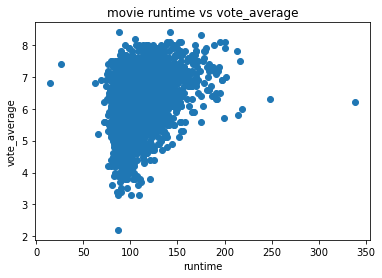

In [29]:
#enhance the data by visualization to detect if there is a relationship bwetween runtimes & averages votes using scatter diagram
plt.scatter(df['runtime'], df['vote_average'])
plt.title('movie runtime vs vote_average')
plt.xlabel('runtime')
plt.ylabel('vote_average')
plt.show()

the scatter showwed that he runtimes has little effect on the vote_averages

# Research Question 3 (which years have the higher budgets & higher profits !)

In [30]:
year_budget = df.groupby(['release_year'])['budget'].mean()
print (year_budget)

release_year
1960    4.161390e+06
1961    3.863700e+06
1962    5.635714e+06
1963    1.018583e+07
1964    4.847880e+06
1965    1.176000e+07
1966    6.453600e+06
1967    7.346154e+06
1968    5.994444e+06
1969    5.711022e+06
1970    8.718359e+06
1971    3.077077e+06
1972    2.958032e+06
1973    4.777250e+06
1974    5.352692e+06
1975    4.122222e+06
1976    8.033333e+06
1977    7.307895e+06
1978    9.774707e+06
1979    1.441875e+07
1980    1.391522e+07
1981    9.725000e+06
1982    1.322692e+07
1983    1.565248e+07
1984    1.364398e+07
1985    1.454331e+07
1986    1.317234e+07
1987    1.323761e+07
1988    1.448750e+07
1989    1.898018e+07
1990    2.300252e+07
1991    2.630000e+07
1992    2.289293e+07
1993    2.223174e+07
1994    2.966897e+07
1995    3.273949e+07
1996    3.531821e+07
1997    4.475874e+07
1998    4.383900e+07
1999    4.239461e+07
2000    4.638654e+07
2001    4.419770e+07
2002    4.284000e+07
2003    4.591601e+07
2004    4.681161e+07
2005    4.273551e+07
2006    4.106677e+07


In [31]:
year_profit = df.groupby(['release_year'])['profits'].mean()
print (year_profit)

release_year
1960    2.163961e+07
1961    2.990832e+07
1962    2.383998e+07
1963    1.923531e+07
1964    4.209691e+07
1965    7.985637e+07
1966    1.049374e+07
1967    4.894882e+07
1968    1.869686e+07
1969    5.171575e+07
1970    4.127909e+07
1971    2.586805e+07
1972    5.715449e+07
1973    8.814051e+07
1974    5.004477e+07
1975    8.980081e+07
1976    4.196177e+07
1977    9.175308e+07
1978    5.912353e+07
1979    5.939563e+07
1980    4.356807e+07
1981    4.400838e+07
1982    6.968294e+07
1983    4.855077e+07
1984    4.365329e+07
1985    4.065607e+07
1986    3.554561e+07
1987    4.670754e+07
1988    4.133906e+07
1989    7.066551e+07
1990    6.637741e+07
1991    6.096243e+07
1992    7.307634e+07
1993    6.355317e+07
1994    7.719727e+07
1995    7.130406e+07
1996    5.648760e+07
1997    7.089157e+07
1998    5.858212e+07
1999    5.545870e+07
2000    5.851400e+07
2001    6.764983e+07
2002    7.131132e+07
2003    7.605087e+07
2004    6.919272e+07
2005    5.840150e+07
2006    5.190655e+07


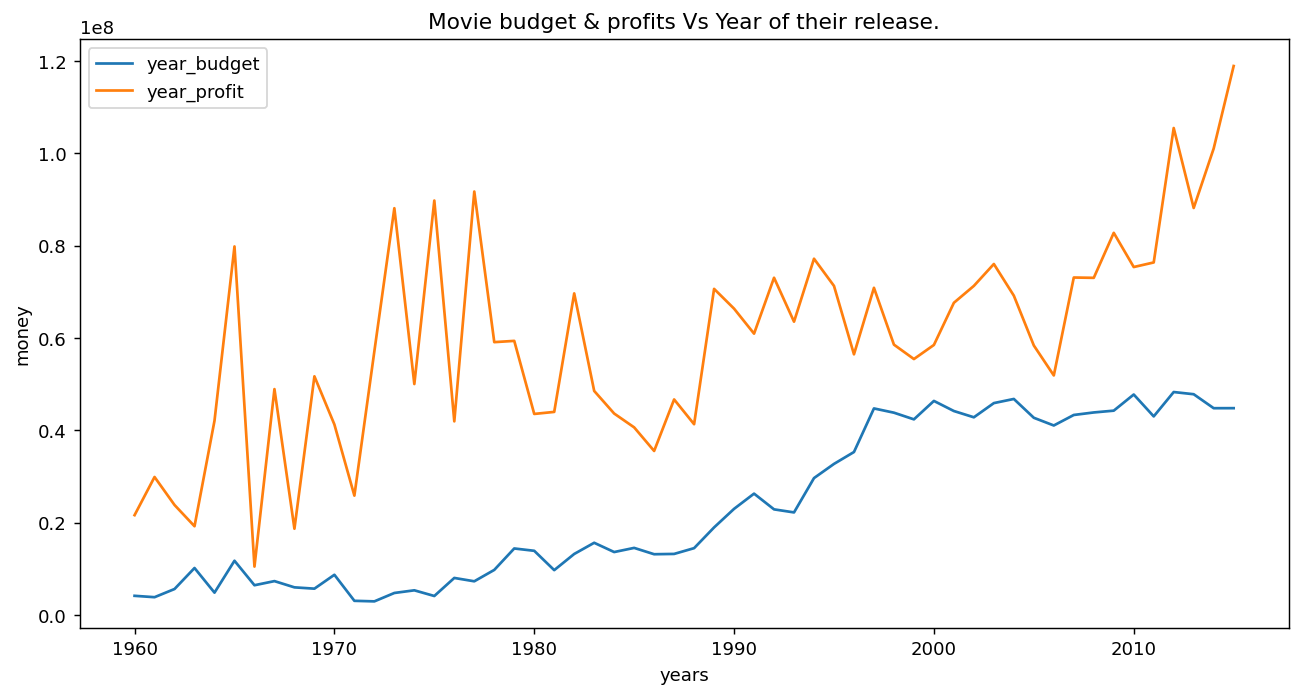

In [32]:
# the data need better representation by plot chart
plt.figure(figsize=(12,6), dpi = 130)
plt.title('Movie budget & profits Vs Year of their release.')
plt.plot(year_budget, label = "year_budget")
plt.plot(year_profit, label = "year_profit")
plt.legend()
plt.xlabel('years')
plt.ylabel("money")
plt.show()

In [33]:
# To find that which year made the highest & lowest budget
year_budget.idxmax()

2012

In [34]:
year_budget.idxmin()

1972

In [35]:
# To find that which year made the highest & lowest profits
year_profit.idxmax()

2015

In [36]:
year_profit.idxmin()

1966

the plotchart showed that there is an ascedending trends on the budgets of the movies along years, while on the other side, the profit is not increasing with the same trends as movies budgets

# Conclusions
This report is the evalaution the Movie Database (TMDb) to determine the answers to these three questions.
Q1- what is the genres with the highest profits 
A1: the data showed that the genres that attract various age groups like family, animation & adventure produced more profits than the other genres which make sense as they are the types of movies where entire family could enter the same movie together even with kids which reflect the profit positively.

!) Q2- the relation between the vote_average & run times !
A2: the idea was to determine if the run times affect the voting. however, the data didnt give clear indications as some directors produced one movie through the year as the movie run times have some many outliers which may affect the relation between the two factors. 

Q3: which years have the higher budgets & higher profits !.
As the data displayed, as the years goes the budget of the movies increased gradually untill the 2000 where the movie budgets showed a somekind of plateau line. On the other hand, the movie profits did not exhibit the same pattern as budget. That gave an indication that it not ncessary to spend more budget on a movie to guarantee that it will give more profit.   

Limitations: 
- This analysis was done considering the data provided to us is completel accurate and reliable. for example, the budget and revenue column do not have currency unit, thats mean that may be some movies budget was calculated in different currency.
- there was so many missing values (the data decreased to less than its half) which affected the overall analysis.
- Further statistical analysis would be needed to ensure there is causation from correlation!. Also, there are movies have overlapped genres types which make it difficult to rely on the correlation of single genre type with the profit.

In [37]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295